# Evaluation Project 3 Loan Application Status Prediction

# BY: Aakash bindal

# BATCH NO:DS2401

# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [10]:
loan=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv",names =  ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','CreditHistory','Property_Area','Loan_Status'])
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
# Display the rows and columns
print('\nNumber of Rows:', loan.shape[0])
print('\nNumber of Columns:', loan.shape[1])


Number of Rows: 614

Number of Columns: 13


# Exploratory Data Analysis

In [12]:
# checking the datatypes of all the columns 
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
Loan_Amount          float64
Loan_Amount_Term     float64
CreditHistory        float64
Property_Area         object
Loan_Status           object
dtype: object

There is float and object type data in the columns of the dataset.

In [13]:
# Checking the nunique values in each columns-
loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
Loan_Amount          203
Loan_Amount_Term      10
CreditHistory          2
Property_Area          3
Loan_Status            2
dtype: int64

In [14]:
# checking the value count of each columns -

for i in loan.columns:
    print('--' * 20 + i + '--' * 20)
    display(loan[i].value_counts().head())

----------------------------------------Loan_ID----------------------------------------


LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
Name: Loan_ID, dtype: int64

----------------------------------------Gender----------------------------------------


Male      489
Female    112
Name: Gender, dtype: int64

----------------------------------------Married----------------------------------------


Yes    398
No     213
Name: Married, dtype: int64

----------------------------------------Dependents----------------------------------------


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

----------------------------------------Education----------------------------------------


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

----------------------------------------Self_Employed----------------------------------------


No     500
Yes     82
Name: Self_Employed, dtype: int64

----------------------------------------ApplicantIncome----------------------------------------


2500    9
4583    6
6000    6
2600    6
3333    5
Name: ApplicantIncome, dtype: int64

----------------------------------------CoapplicantIncome----------------------------------------


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
Name: CoapplicantIncome, dtype: int64

----------------------------------------Loan_Amount----------------------------------------


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
Name: Loan_Amount, dtype: int64

----------------------------------------Loan_Amount_Term----------------------------------------


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
Name: Loan_Amount_Term, dtype: int64

----------------------------------------CreditHistory----------------------------------------


1.0    475
0.0     89
Name: CreditHistory, dtype: int64

----------------------------------------Property_Area----------------------------------------


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

----------------------------------------Loan_Status----------------------------------------


Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   Loan_Amount        592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



Columns with Null Values: Gender, Married, Dependents, Self Employed, Loan Amount, Credit History, Loan Amount Term

In [16]:
# Drop loan_ID because it is irrelevant.
loan.drop(columns='Loan_ID', inplace= True)

Drop loan_ID because it is irrelevant.


# Checking Null and Duplicates Values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
Loan_Amount          22
Loan_Amount_Term     14
CreditHistory        50
Property_Area         0
Loan_Status           0
dtype: int64


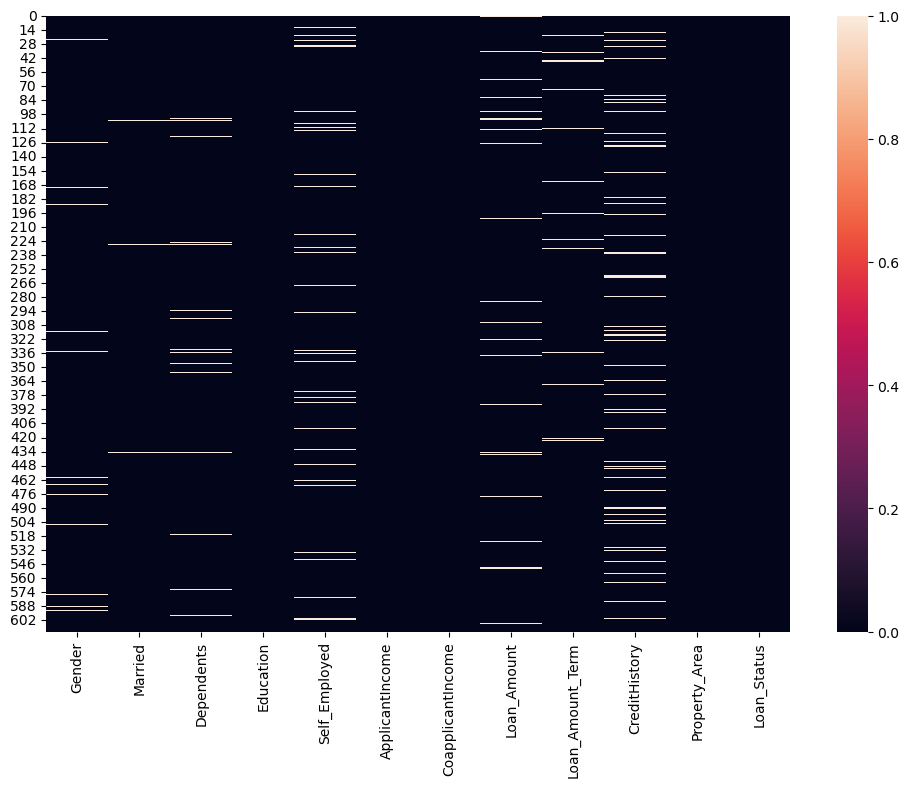

In [17]:
#Checking for Missing Values

plt.figure(figsize=[12,8])
sns.heatmap(loan.isnull())
print(loan.isnull().sum())

# Complete the missing values and again check null values.

In [20]:
# Replacing values in the 'Credit_History'column

loan['CreditHistory']=loan['CreditHistory'].map({1:'Yes',0:'No'})
loan.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Yes,Urban,Y


In [23]:
#Imputing the mode value of a column for categorical data- 

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['CreditHistory'].fillna(loan['CreditHistory'].mode()[0],inplace = True)

In [25]:
#imputing the mean value of a column for continuous data-

loan['Loan_Amount'].fillna(np.mean(loan['Loan_Amount']),inplace = True)
loan['Loan_Amount_Term'].fillna(np.mean(loan['Loan_Amount_Term']),inplace = True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
CreditHistory        0
Property_Area        0
Loan_Status          0
dtype: int64


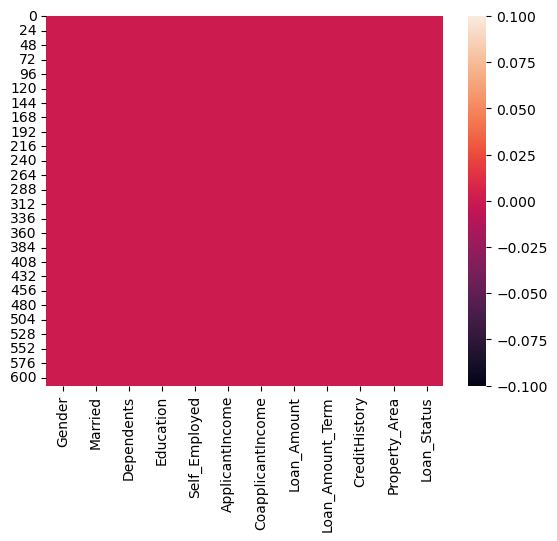

In [26]:
sns.heatmap(loan.isnull())
print(loan.isnull().sum())

After filling in the null values, there are no longer any null values present in the dataset.

# Correlation of Dataset

In [37]:
# correlation numerical colmns
loan.corr()

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675
Loan_Amount,0.565620,0.187828,1.000000,0.038801
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000


<Axes: >

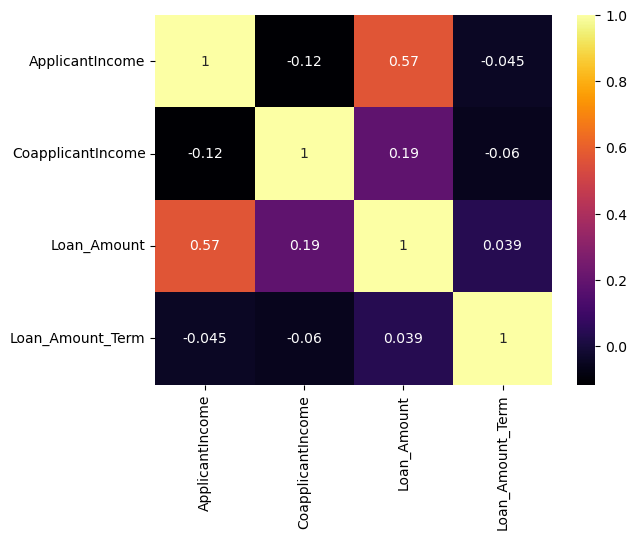

In [38]:
# correlation numerical colmns
sns.heatmap(loan.corr(), annot= True , cmap='inferno')

# Data Visualisation

<Axes: ylabel='Loan_Amount_Term'>

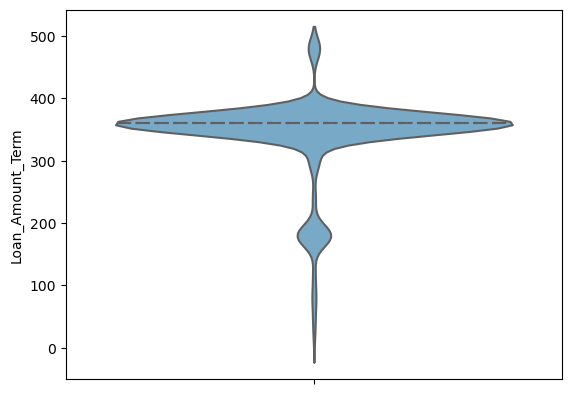

In [35]:
sns.violinplot(y=loan["Loan_Amount_Term"], inner="quartile", palette="Blues")

<Axes: ylabel='Loan_Amount'>

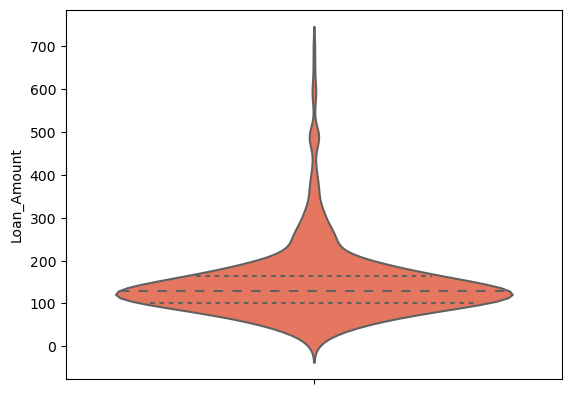

In [27]:
sns.violinplot(y=loan["Loan_Amount"], inner="quartile", palette="Reds")

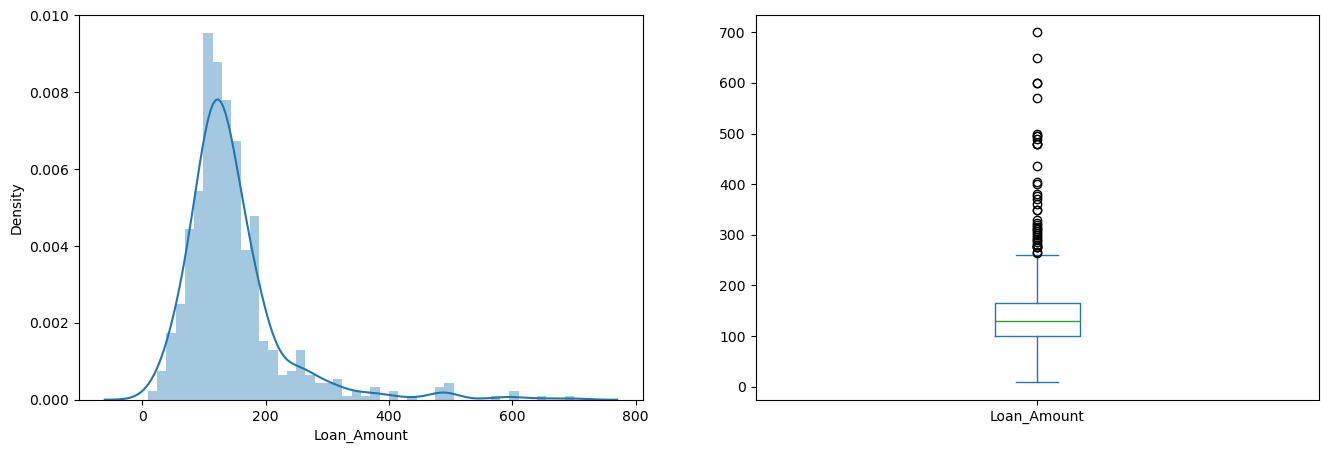

In [34]:
plt.figure(1) 
plt.subplot(1,2,1) 
sns.distplot(loan['Loan_Amount']); 
plt.subplot(1,2,2) 
loan['Loan_Amount'].plot.box(figsize=(16,5)) 
plt.show()

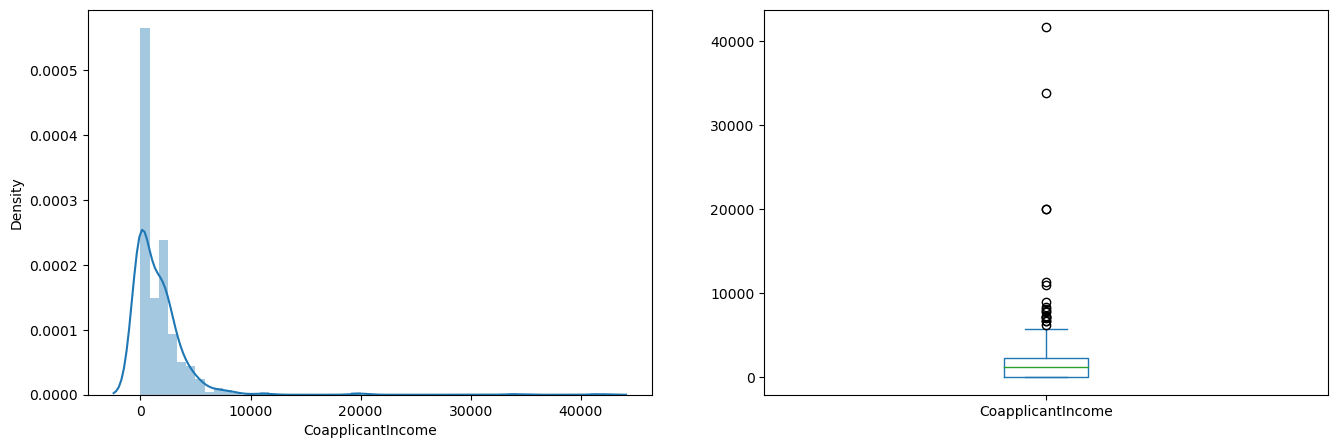

In [28]:
plt.figure(1) 
plt.subplot(1,2,1) 
sns.distplot(loan['CoapplicantIncome']); 
plt.subplot(1,2,2) 
loan['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

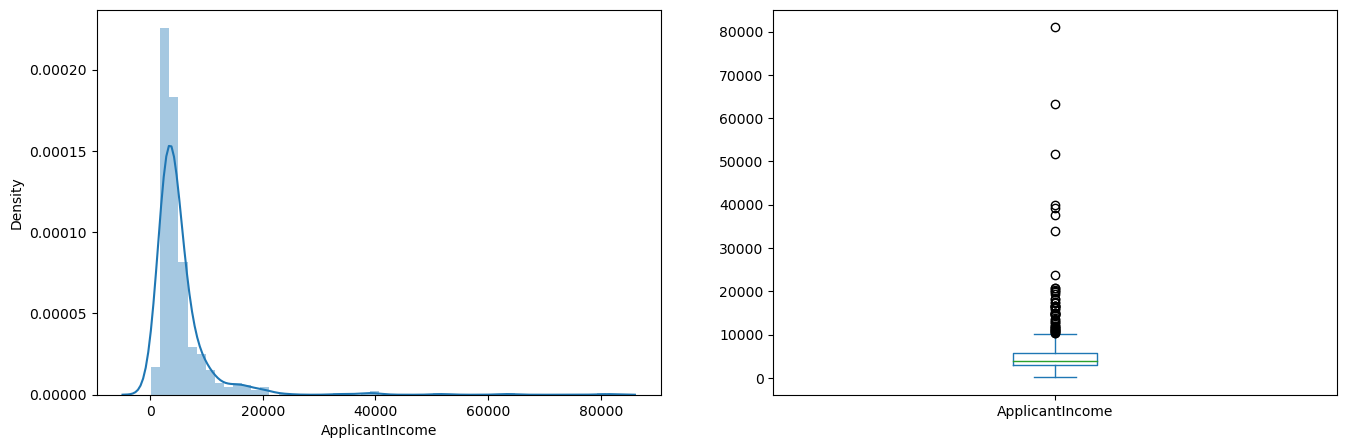

In [30]:
plt.figure(1) 
plt.subplot(1,2,1) 
sns.distplot(loan['ApplicantIncome']); 
plt.subplot(1,2,2) 
loan['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

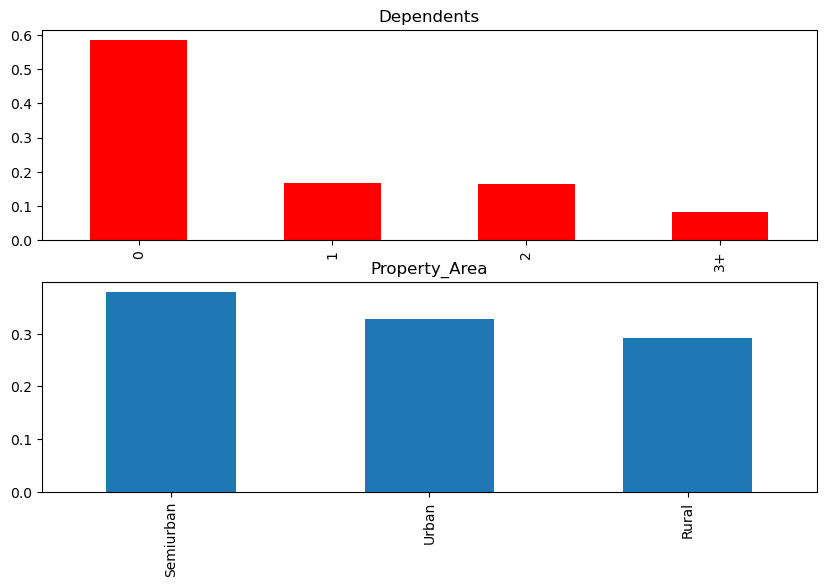

In [31]:
plt.subplot(2,1,1)
loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,6), title= 'Dependents', color='r')
plt.subplot(2,1,2)
loan['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

<Axes: xlabel='Education', ylabel='count'>

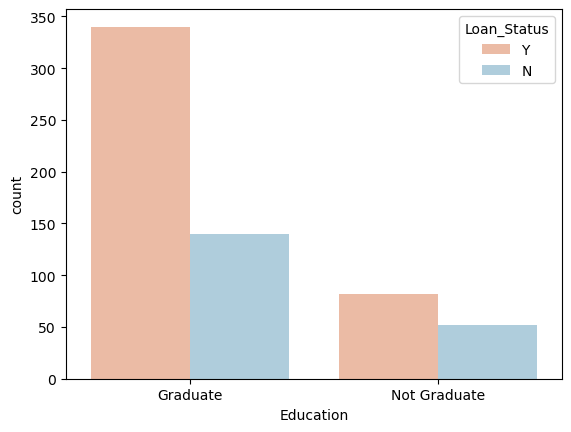

In [36]:
sns.countplot(x='Education',hue='Loan_Status',data=loan,palette="RdBu")

<function matplotlib.pyplot.show(close=None, block=None)>

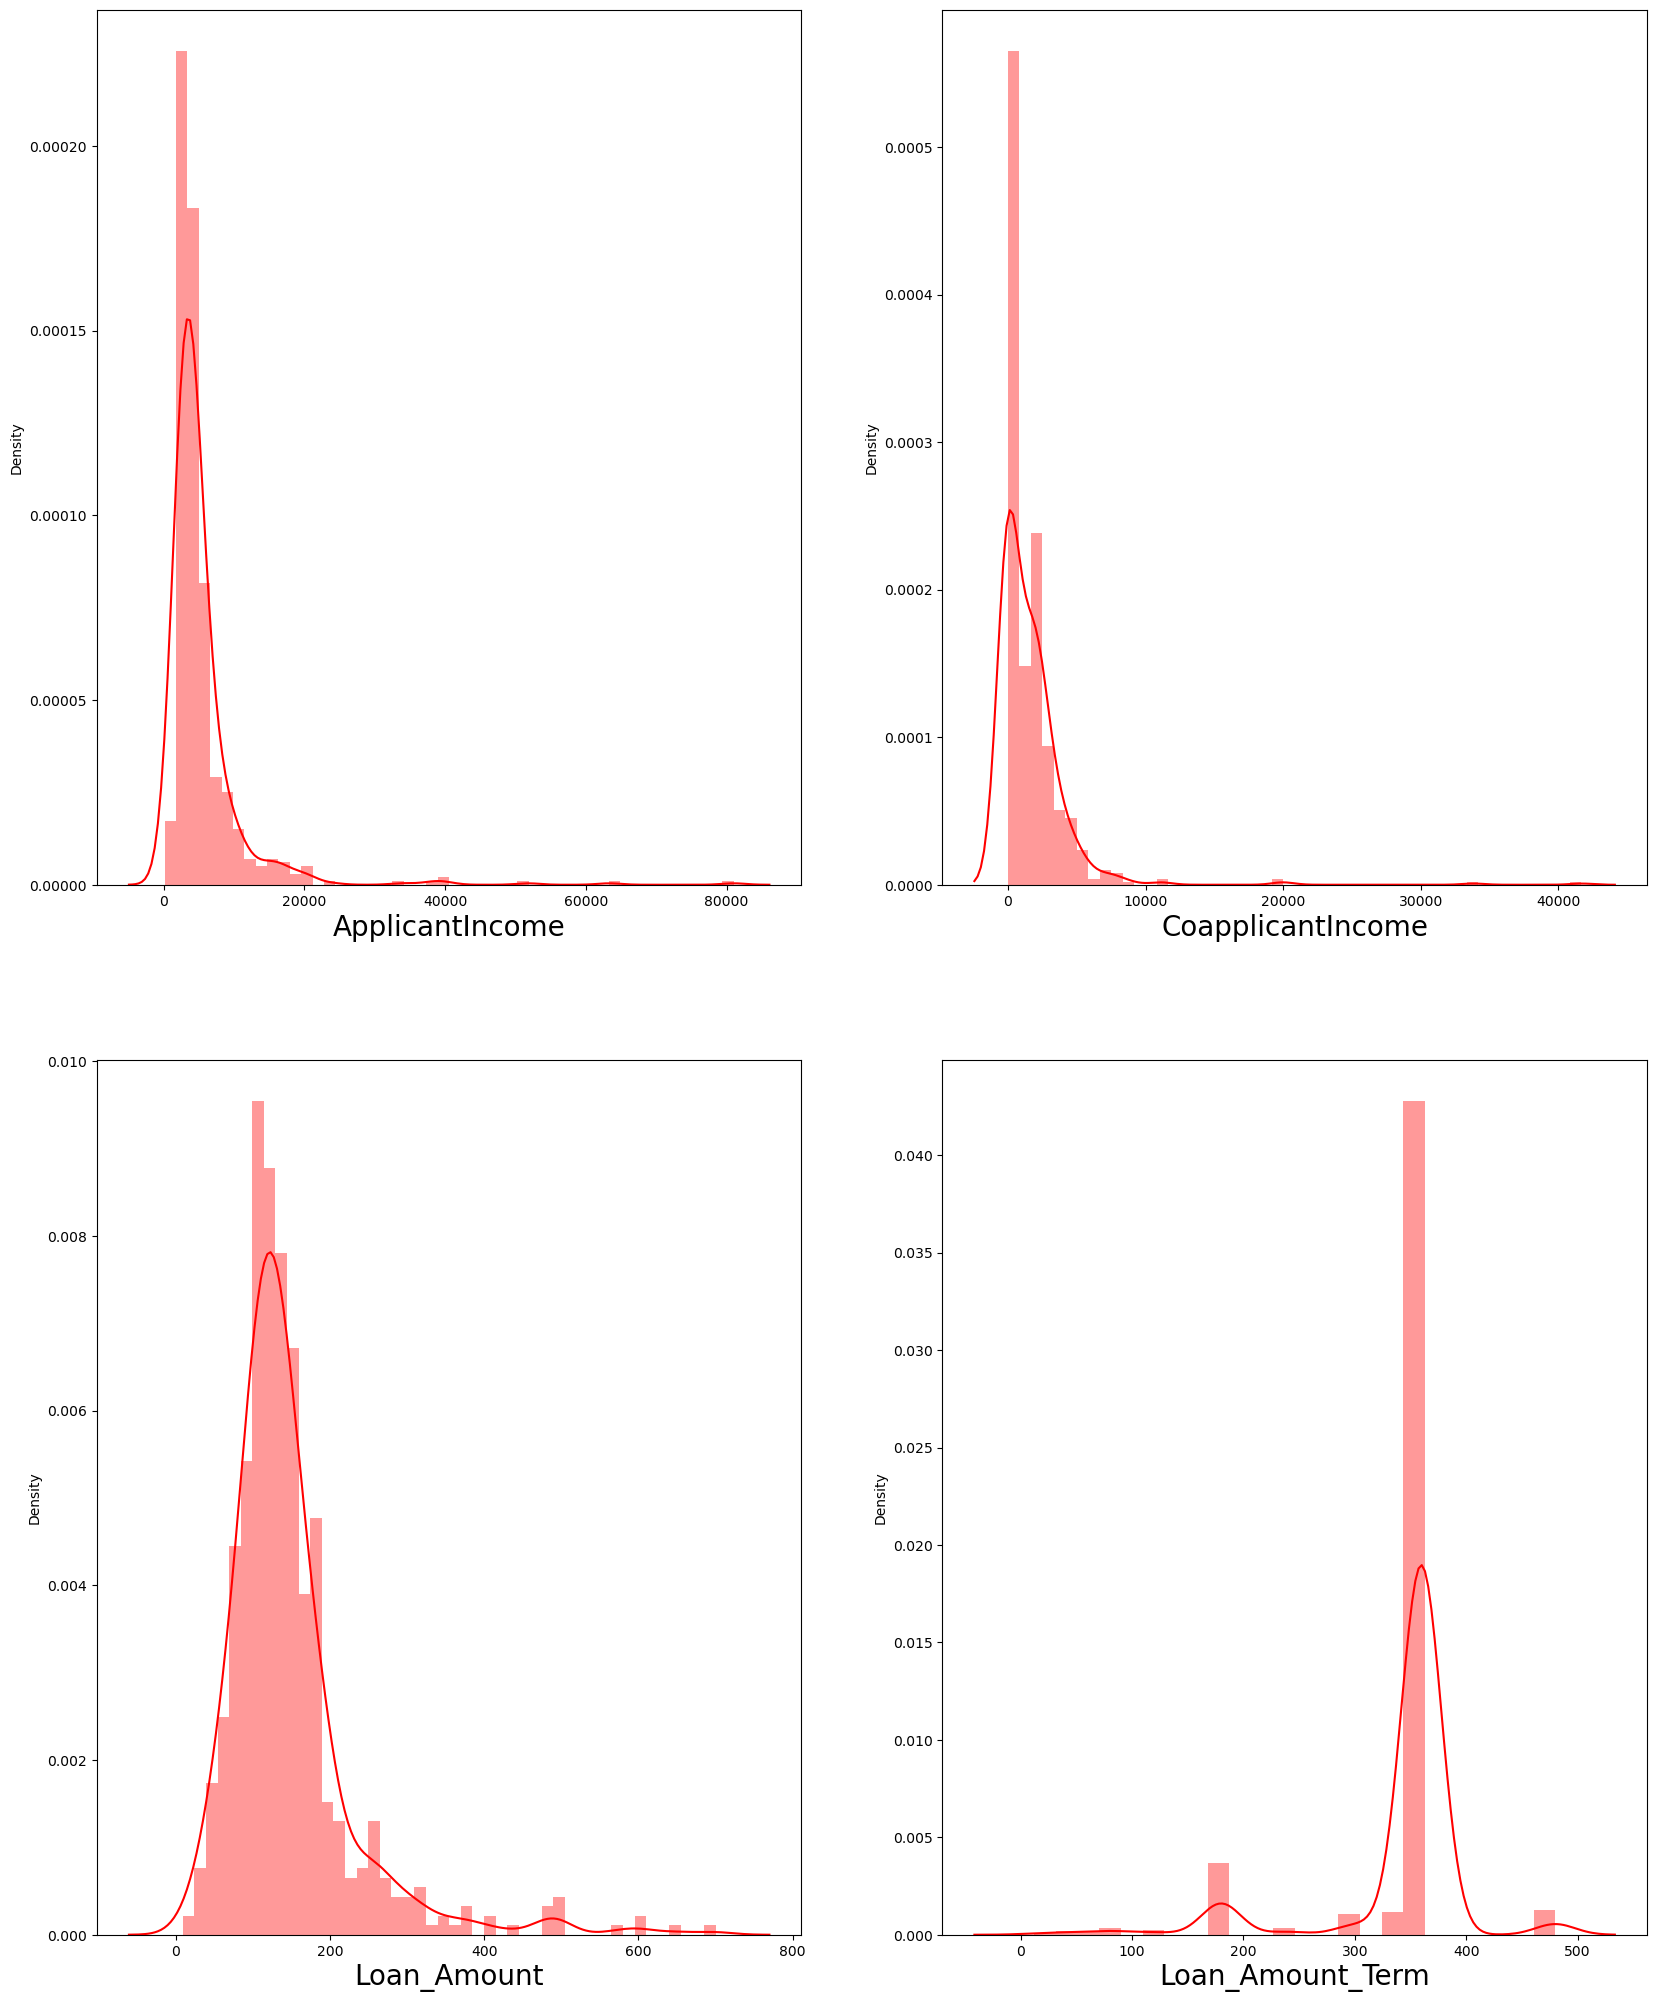

In [39]:
num_loan = loan.select_dtypes(exclude='object')
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in num_loan:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.distplot(loan[col],color='red')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

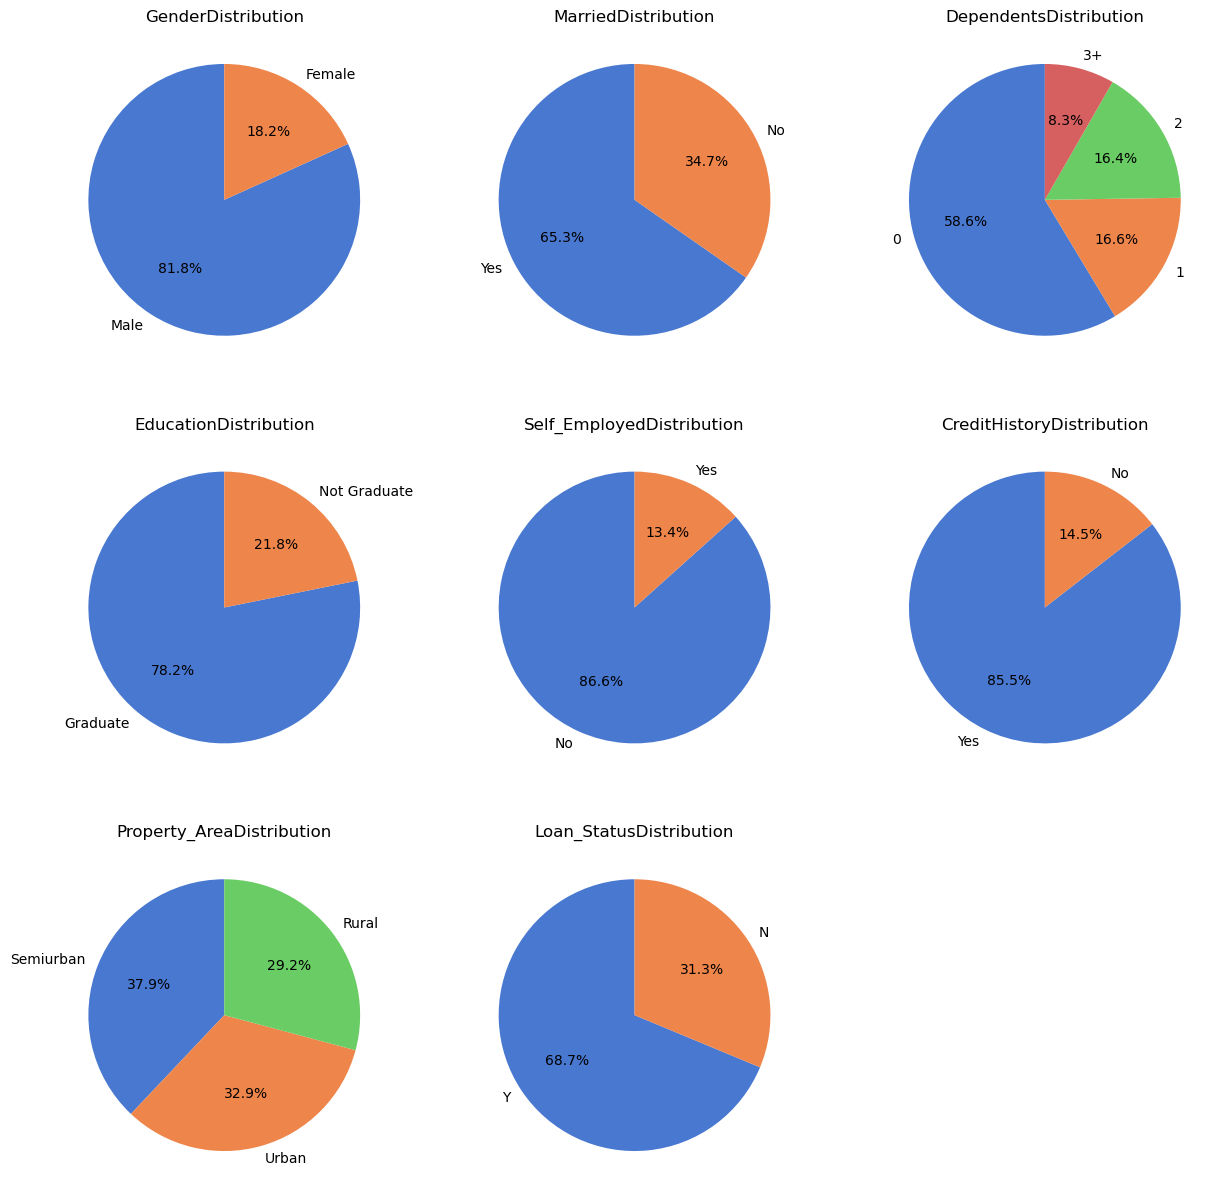

In [40]:
categorical_var=['Gender','Married','Dependents','Education','Self_Employed','CreditHistory','Property_Area','Loan_Status']
fig,axs=plt.subplots(nrows=3,ncols=3, figsize=(15,15))

for i,var in enumerate(categorical_var):
    if i < len(axs.flat):
        cat=loan[var].value_counts()
        axs.flat[i].pie(cat,labels=cat.index, autopct='%1.1f%%',startangle=90,shadow=False,colors=sns.color_palette('muted'))
        axs.flat[i].set_title(f'{var}Distribution')
axs[2,2].remove()
plt.show()

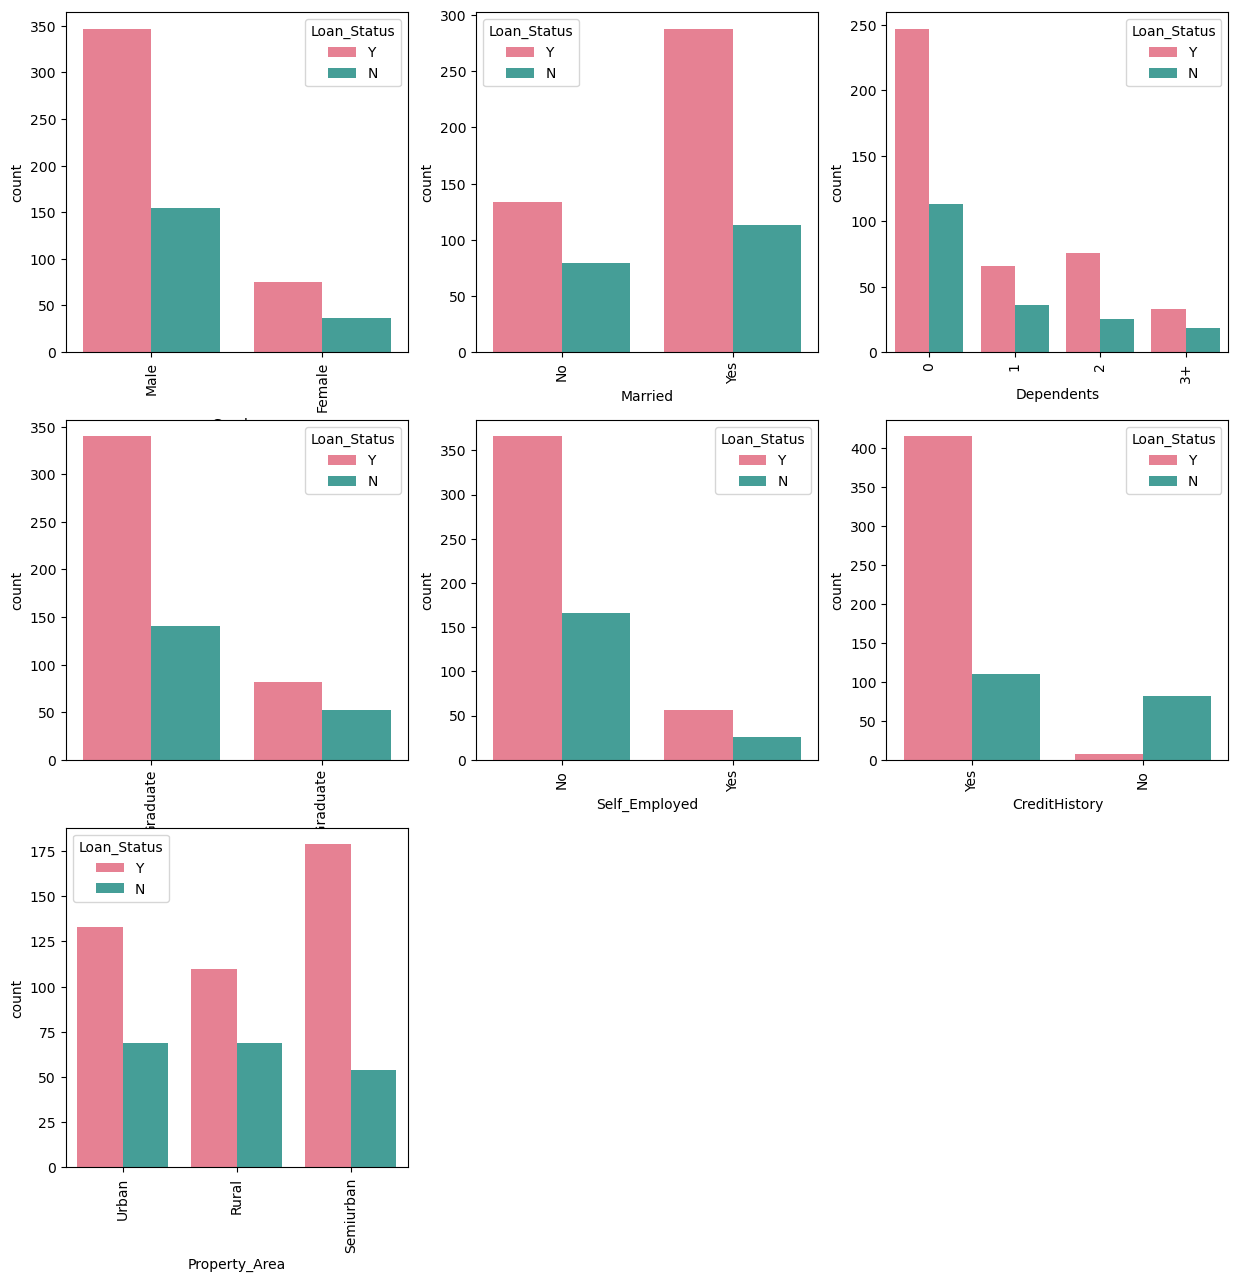

In [41]:
fig,axs=plt.subplots(nrows=3,ncols=3, figsize=(15,15))
axs=axs.flatten()

for i,var in enumerate(categorical_var):
    sns.countplot(x=var , hue='Loan_Status' ,data= loan , ax=axs[i],palette='husl')
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation = 90)
fig.delaxes(axs[7])
fig.delaxes(axs[8])
plt.show()

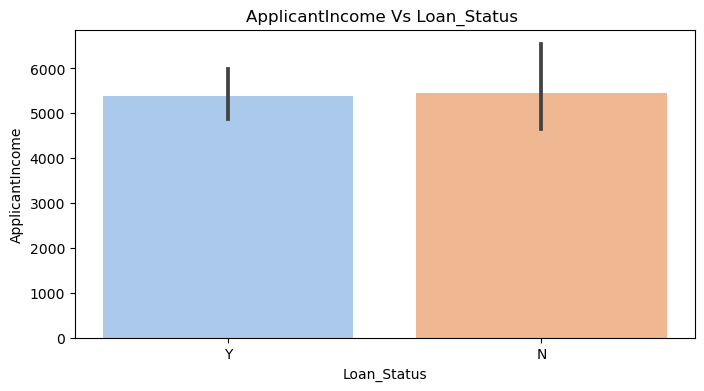

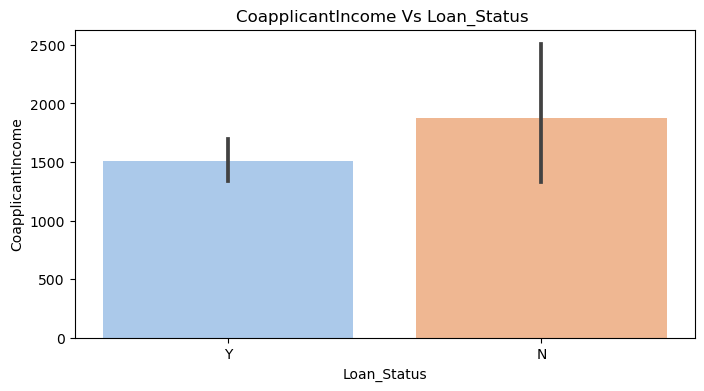

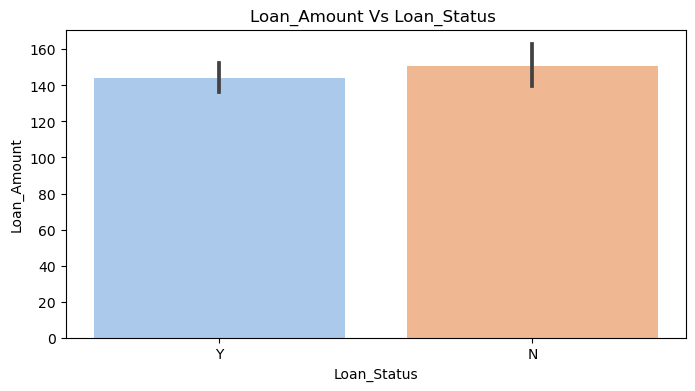

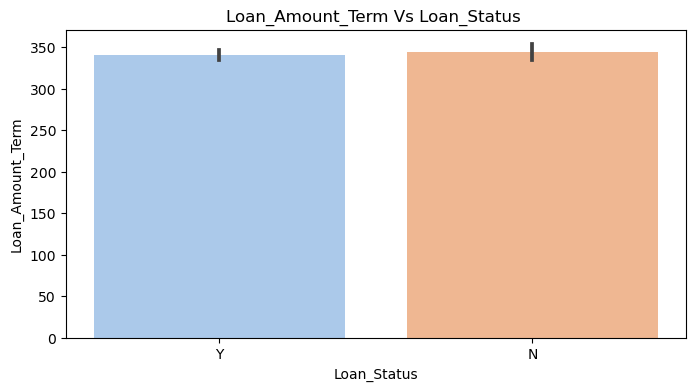

In [42]:
# let do bivariate analysis of numerical data-
#for Numeric columns
num_loan = loan.select_dtypes(exclude='object')
for col in num_loan:
    plt.figure(figsize=(8,4))
    plt.title(col+' Vs Loan_Status ')
    sns.barplot(y =col, x="Loan_Status",palette='pastel' ,data = loan)
    plt.plot()

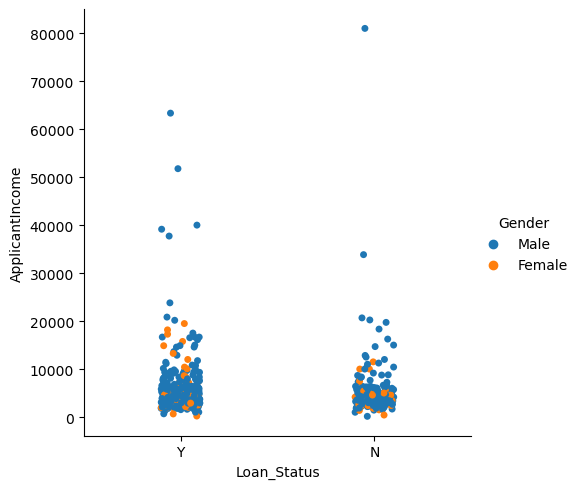

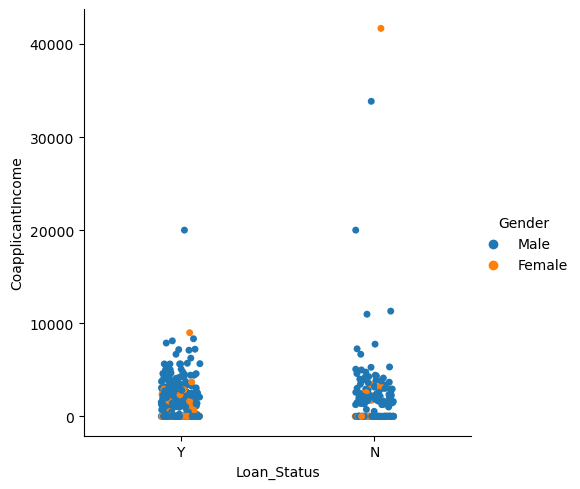

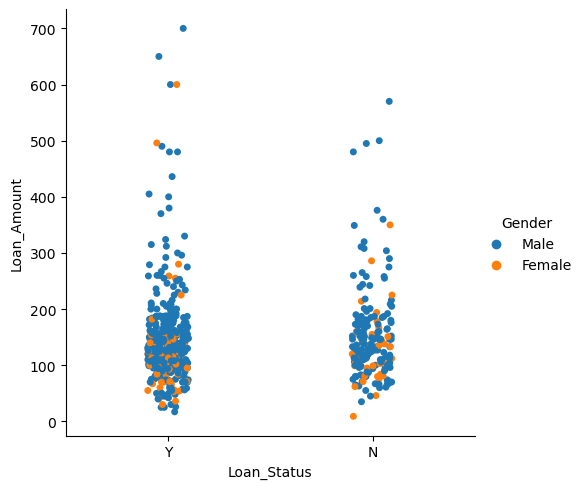

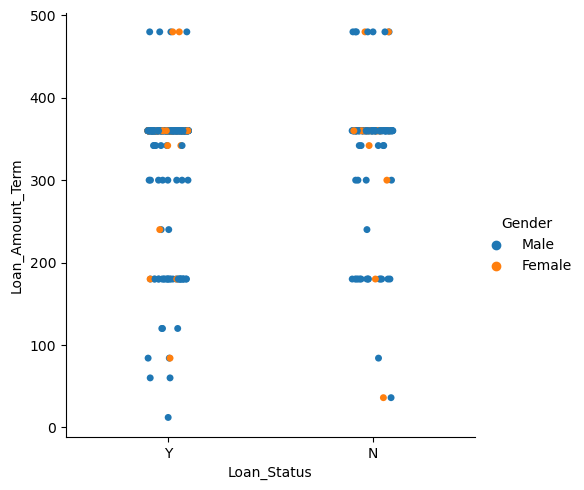

In [43]:
for col in num_loan:
    sns.catplot(x ='Loan_Status', y = col,data = loan,hue = 'Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

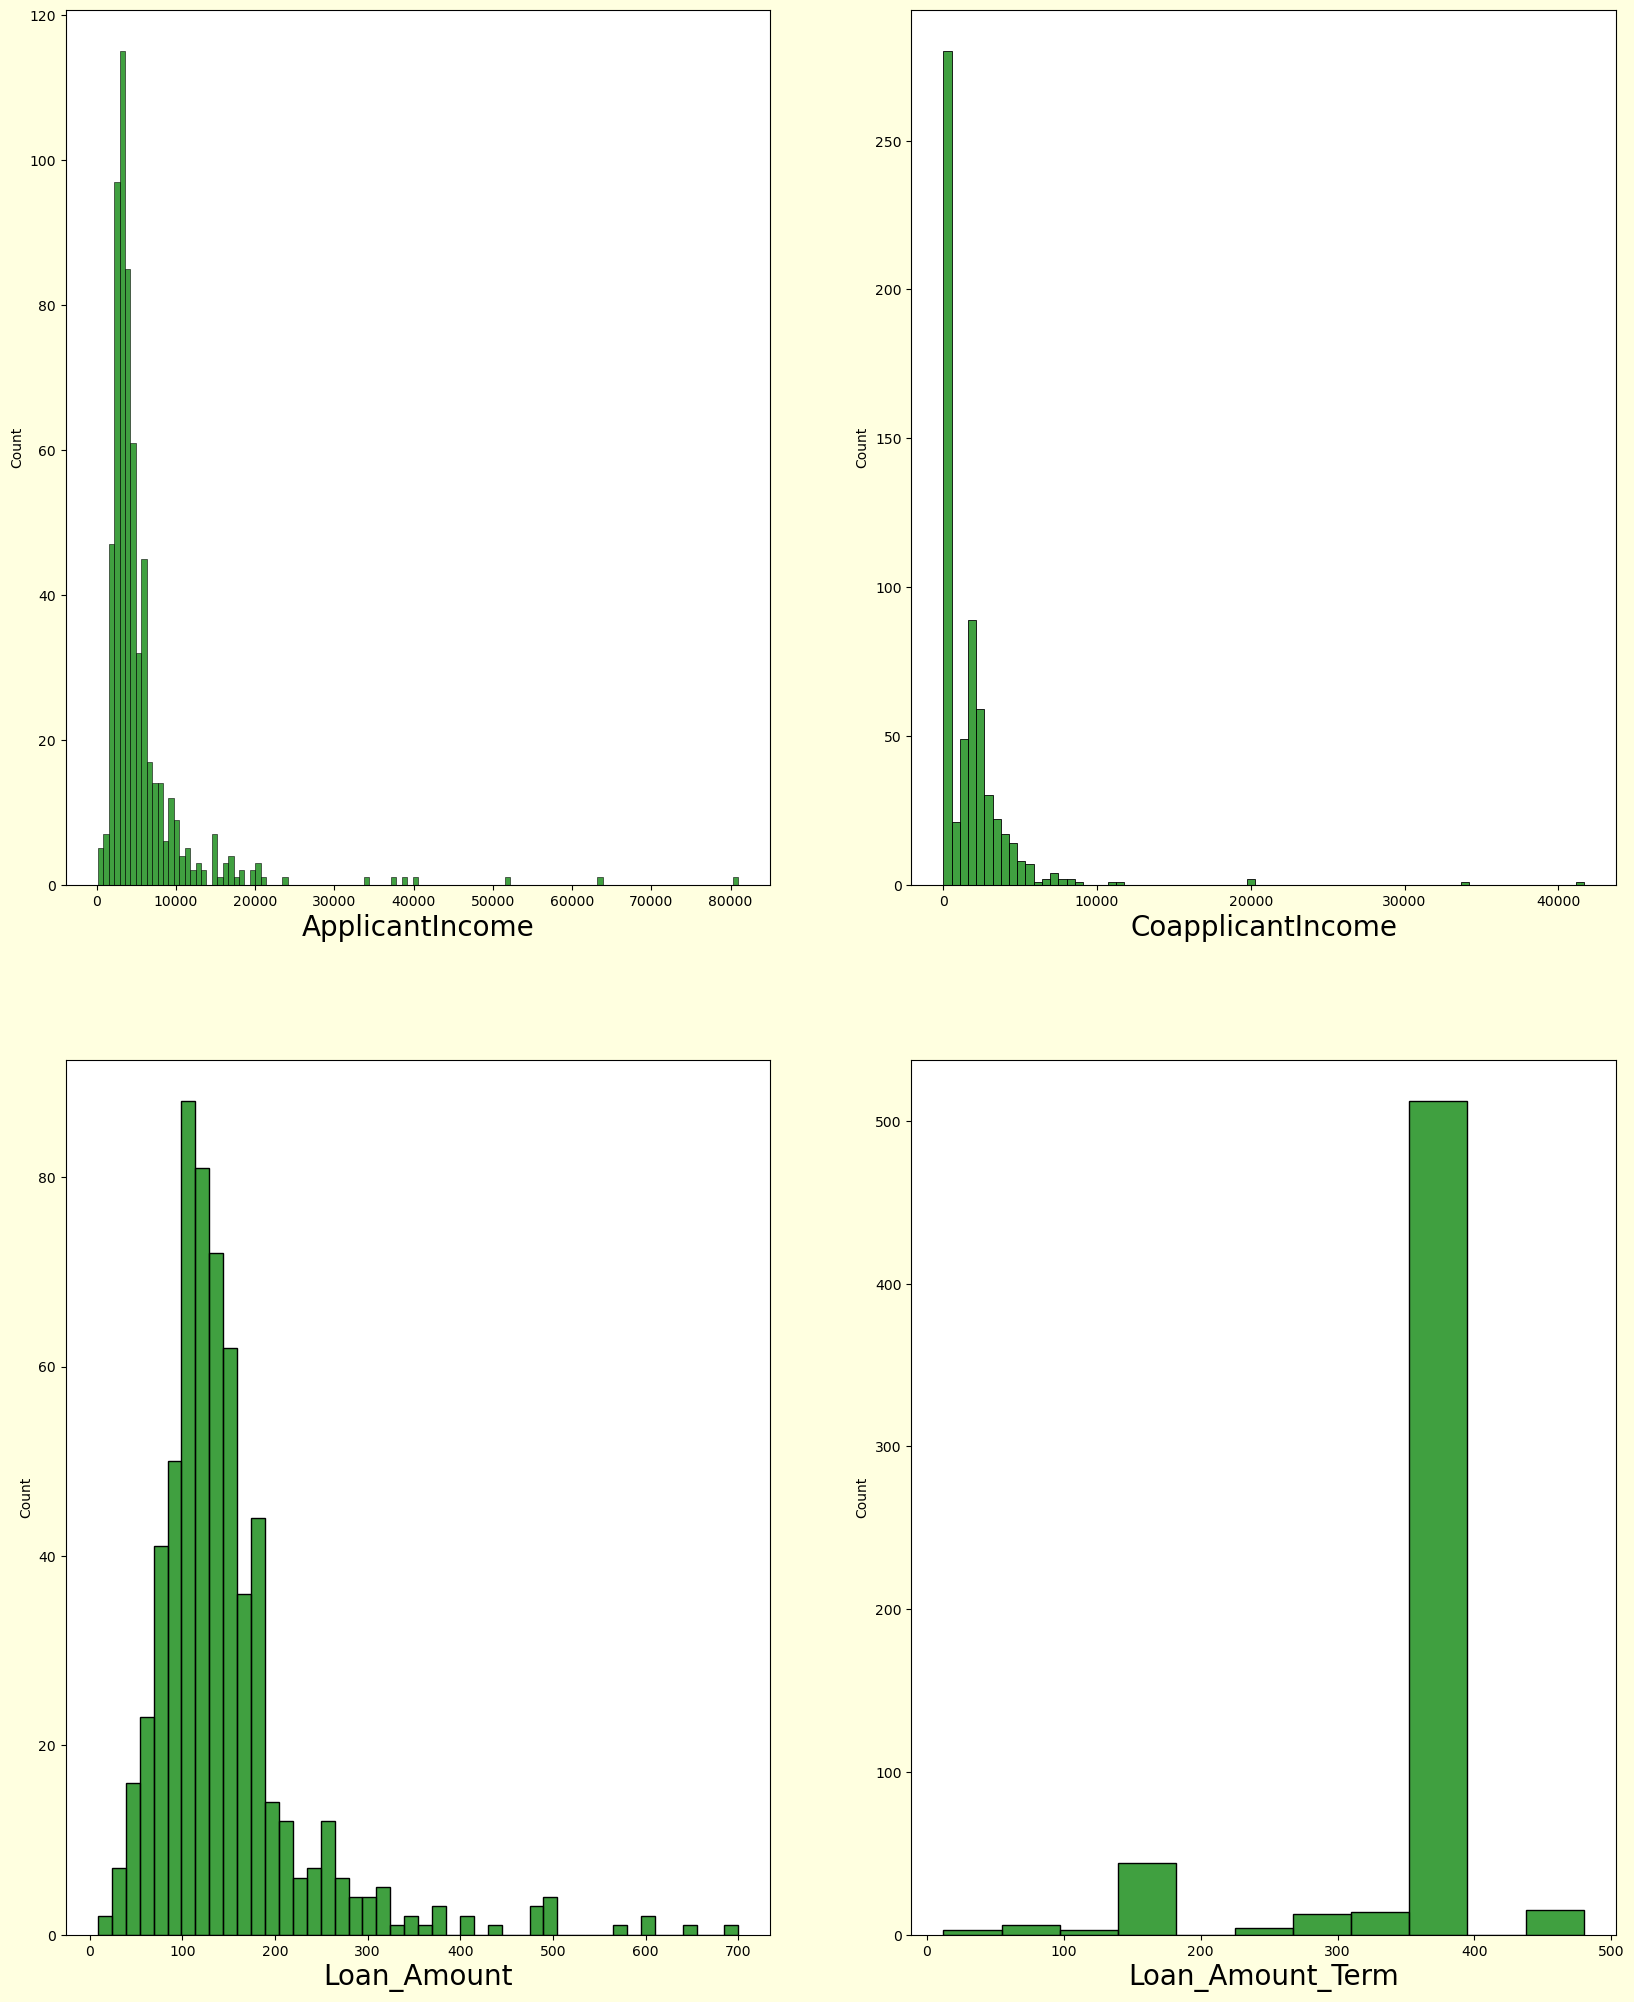

In [44]:
num_loan = loan.select_dtypes(exclude='object')
plt.figure(figsize=(20,25),facecolor='lightyellow')
plotnum=1
for col in num_loan:
    if plotnum<=4:
        plt.subplot(2,2,plotnum)
        sns.histplot(loan[col],color='green')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show

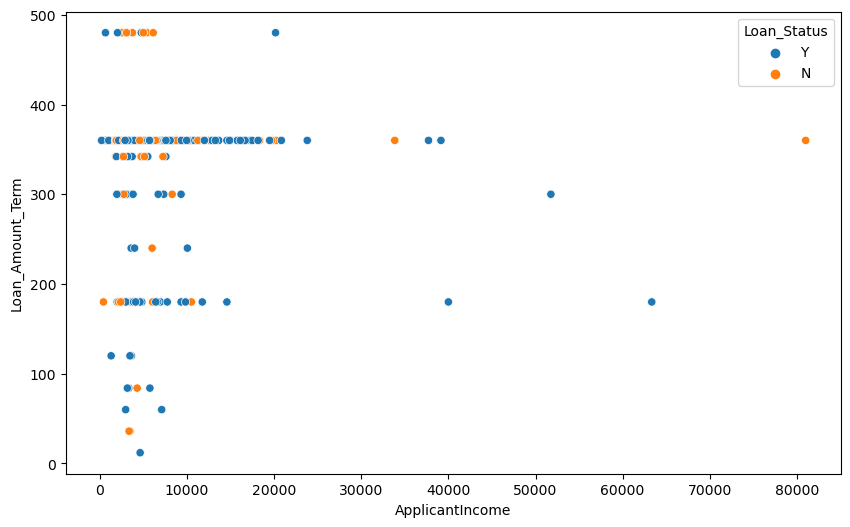

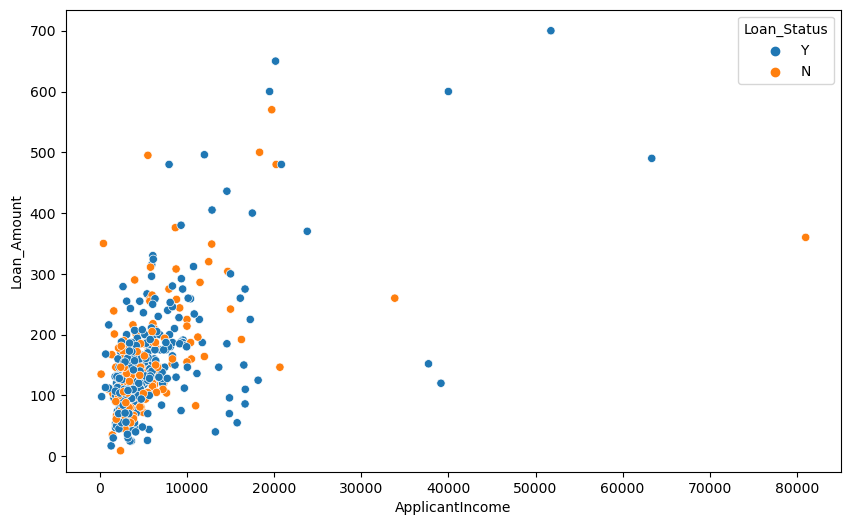

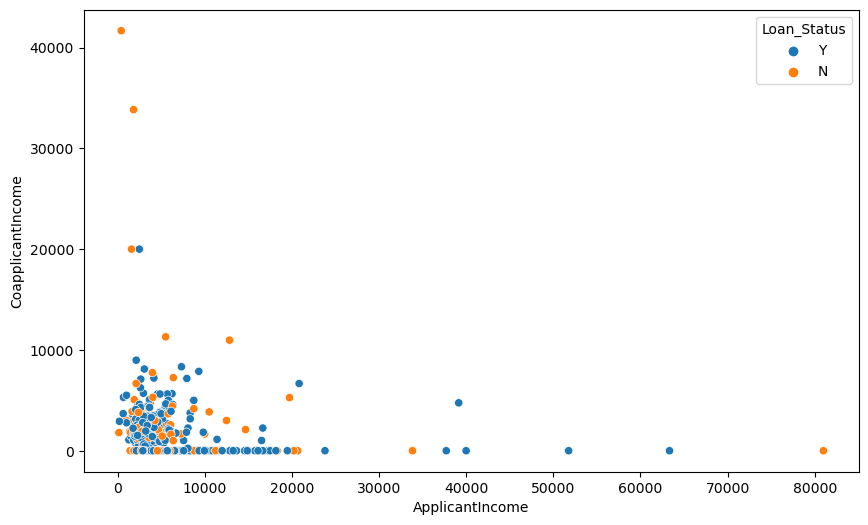

In [46]:
features = ['Loan_Amount_Term','Loan_Amount','CoapplicantIncome']
for col in features:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='ApplicantIncome',y=col,hue='Loan_Status',data=loan)

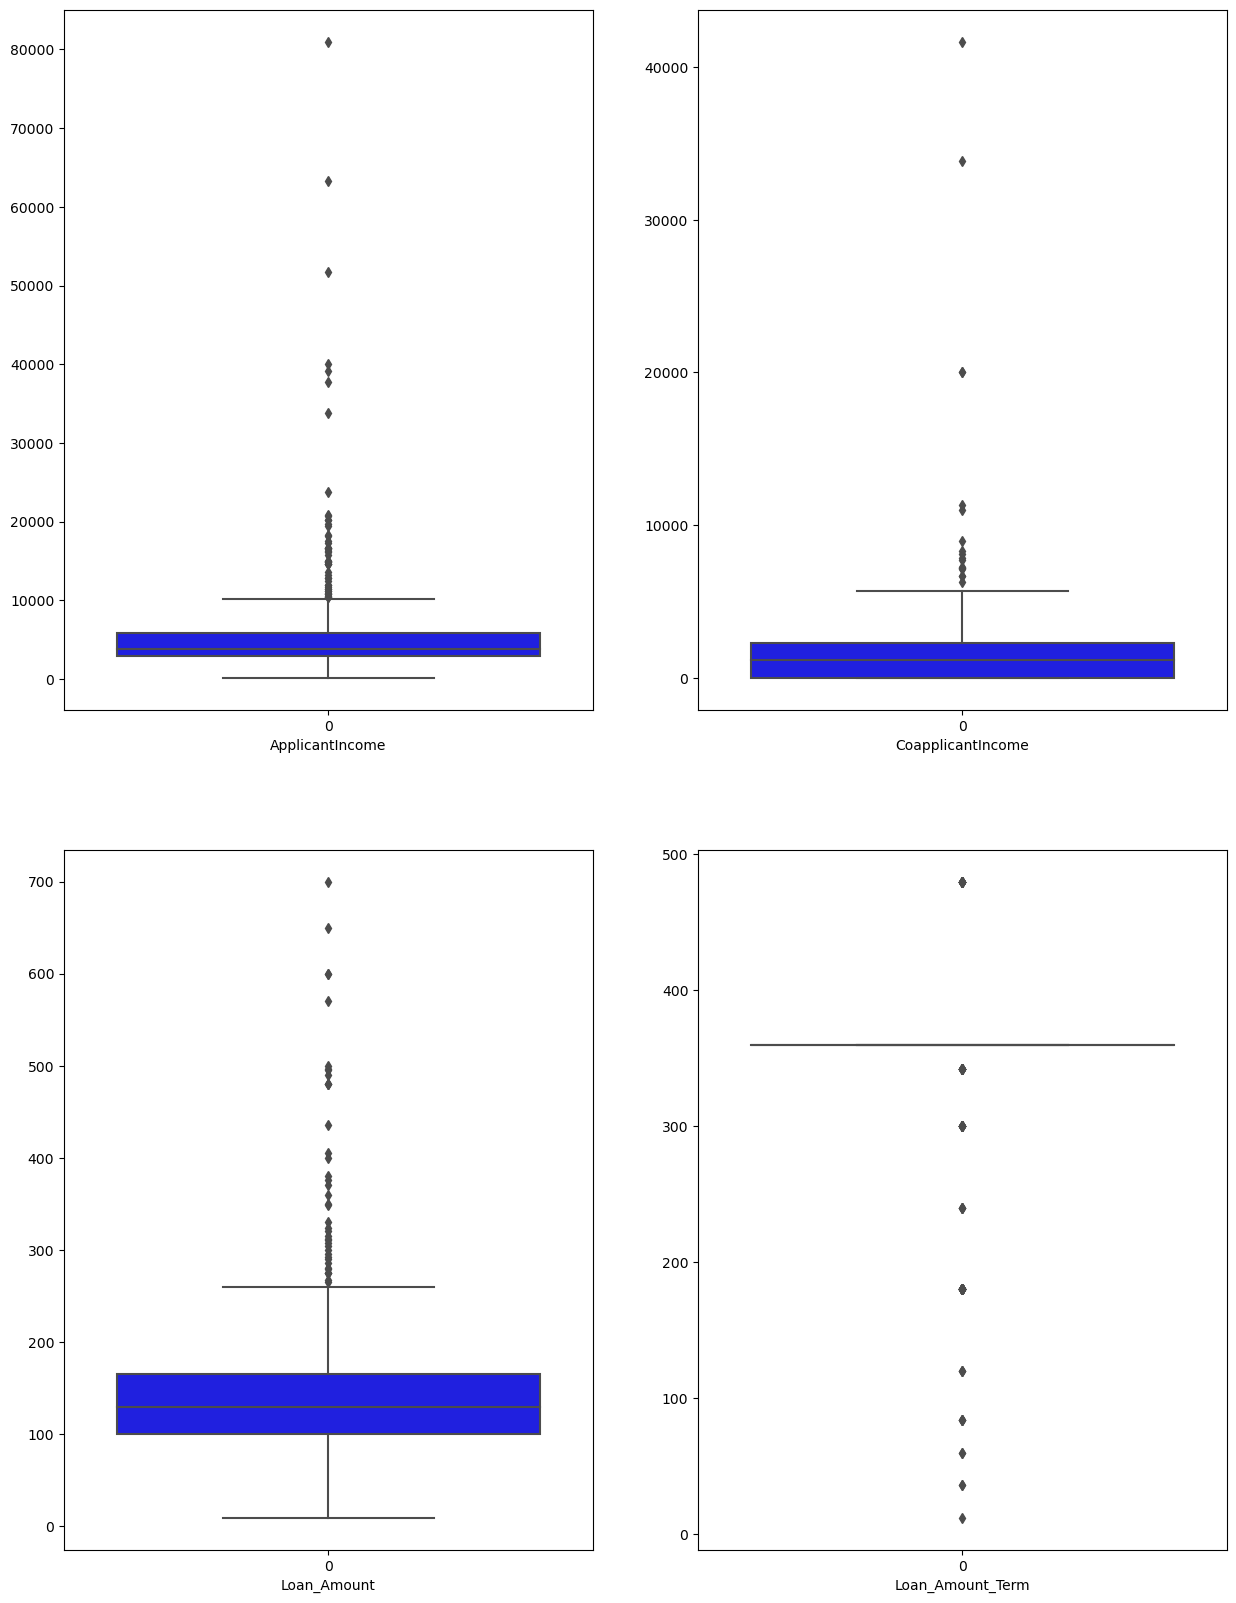

In [47]:
plt.figure(figsize=(15,20))
plot=1
for col in num_loan:
    if plot<=4:
        plt.subplot(2,2,plot)
        sns.boxplot(loan[col],color = 'b')
        plt.xlabel(col)
        plot=plot+1
plt.show()

# STATISTICAL SUMMARY-


In [48]:
#STATISTICAL SUMMARY-
loan.describe()

,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000
std,6109.041673,2926.248369,84.037468,64.372489
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


 mean is greater than median in most of the columns such as 'Gender','Married','Dependent','Applicant income','Coapplicantincome'and'LoanAmount', which is indicative of that the data is right skewed .
The difference between 75th percentile and max value is much higher in 'Applicant income','Coapplicantincome','LoanAmount','Loan_Amount_Term' and 'Dependents', which is suggestive of outliers .

# Lable Encoding

In [50]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   Loan_Amount        614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   CreditHistory      614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 57.7 KB


In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
for i in loan.columns:
    if loan[i].dtypes == "object":
        loan[i] = le.fit_transform(loan[i].values.reshape(-1,1))

In [52]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


# Check Correlation of Dataset After Label Encoding

In [54]:
#Plotting the correlation of columns
loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
Loan_Amount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
CreditHistory,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<Axes: >

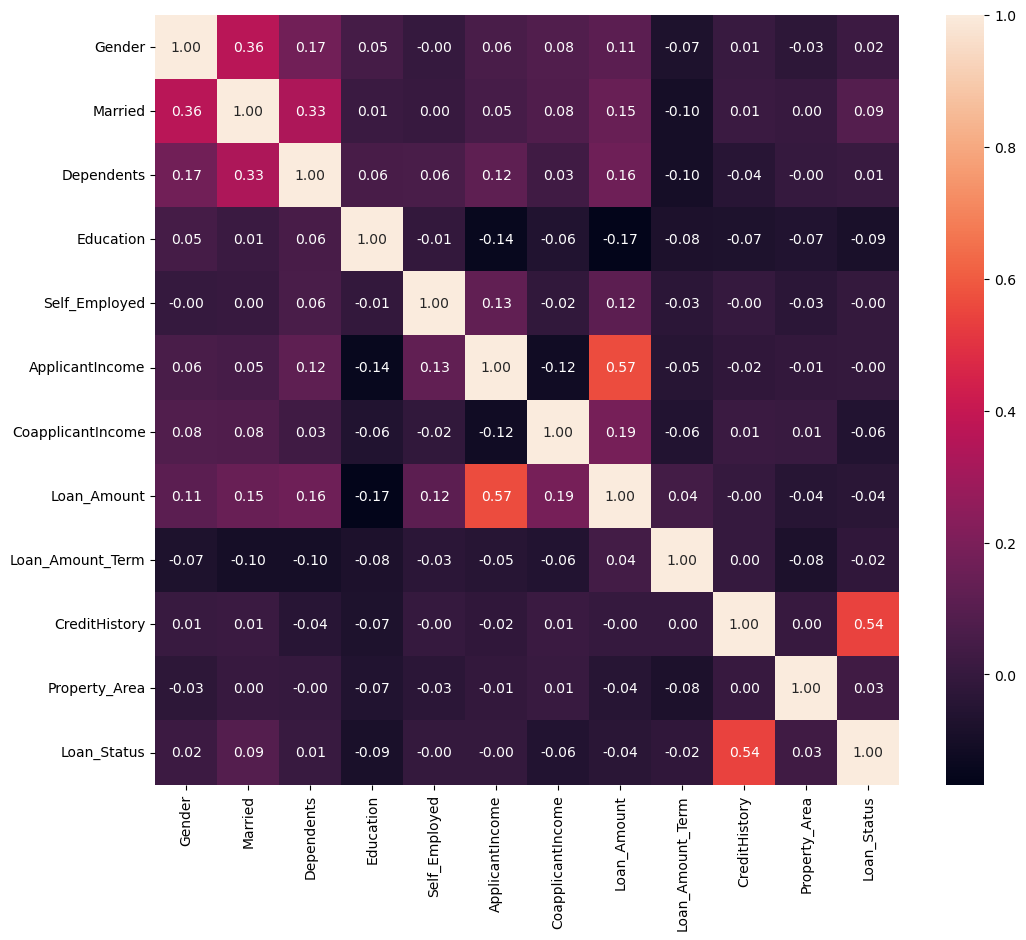

In [55]:
plt.figure(figsize=[12,10])
sns.heatmap(loan.corr(),annot = True, fmt = '0.2f')

In [56]:
print(loan.corr()['Loan_Status'].drop('Loan_Status').sort_values(ascending = False))

CreditHistory        0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
Loan_Amount         -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


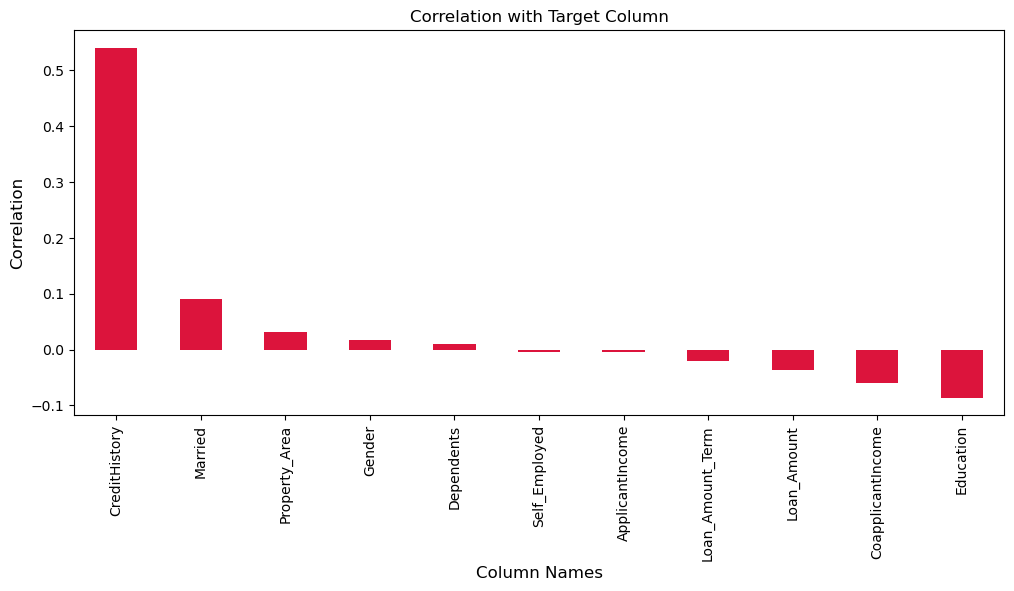

In [57]:
plt.figure(figsize = [12,5])
loan.corr()['Loan_Status'].sort_values(ascending= False).drop('Loan_Status').plot(kind = 'bar', color ='crimson')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Loan status is highly positively correlated with 'Credit_History', while negatively correlated with 'Education'.
Except the columns ['Credit_History', 'Married', 'Property_Area', 'Gender', 'Dependents'] all other columns are having positive correlation to the target variable 'Loan_Status'.
The column 'Dependents' is having least positve correlation to the target variable 'Loan_Status' and the column 'Self_Employed' is having least negative correlation to the target variable 'Loan_Status'.

# Checking  and Removing skewness

In [58]:
loan.skew().sort_values(ascending = False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
Loan_Amount          2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
CreditHistory       -2.021971
Loan_Amount_Term    -2.389680
dtype: float64

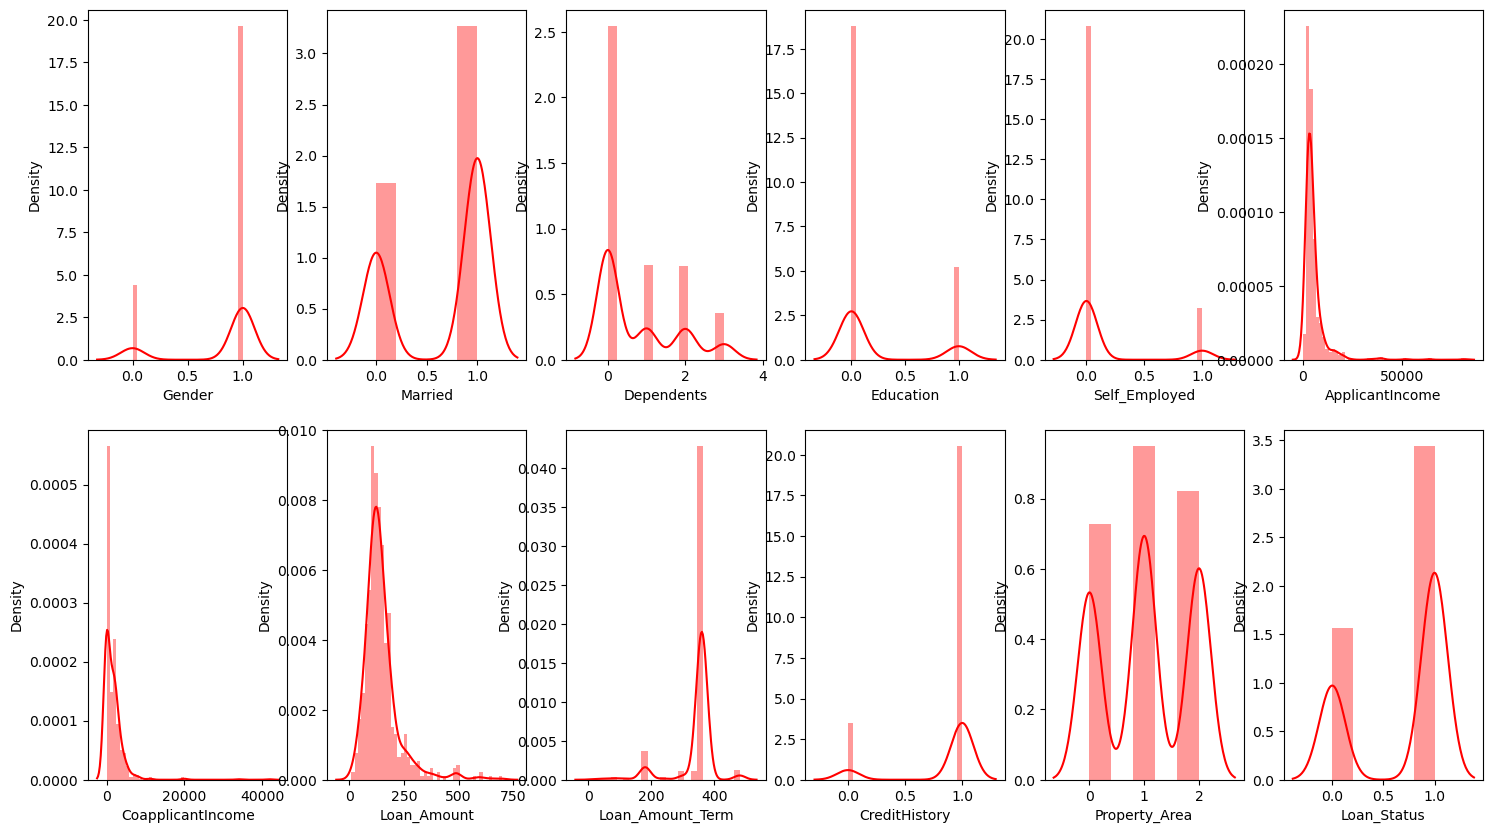

In [59]:
plt.figure(figsize=(18,10))
plot=1
for col in loan.columns:
    if plot<=12:
        plt.subplot(2,6,plot)
        sns.distplot(loan[col],color='red')
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [60]:
from sklearn.preprocessing import power_transform
skewed = ['CoapplicantIncome','ApplicantIncome','Loan_Amount','CreditHistory','Loan_Amount_Term','Self_Employed','Education','Dependents','Gender']
for col in skewed:
    loan[col]=power_transform((loan[col].values.reshape(-1,1)))

In [61]:
loan.skew().sort_values(ascending=False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.389827
Loan_Amount          0.024376
Property_Area       -0.066196
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
CreditHistory       -2.021971
dtype: float64

# Cheking and removing outliers

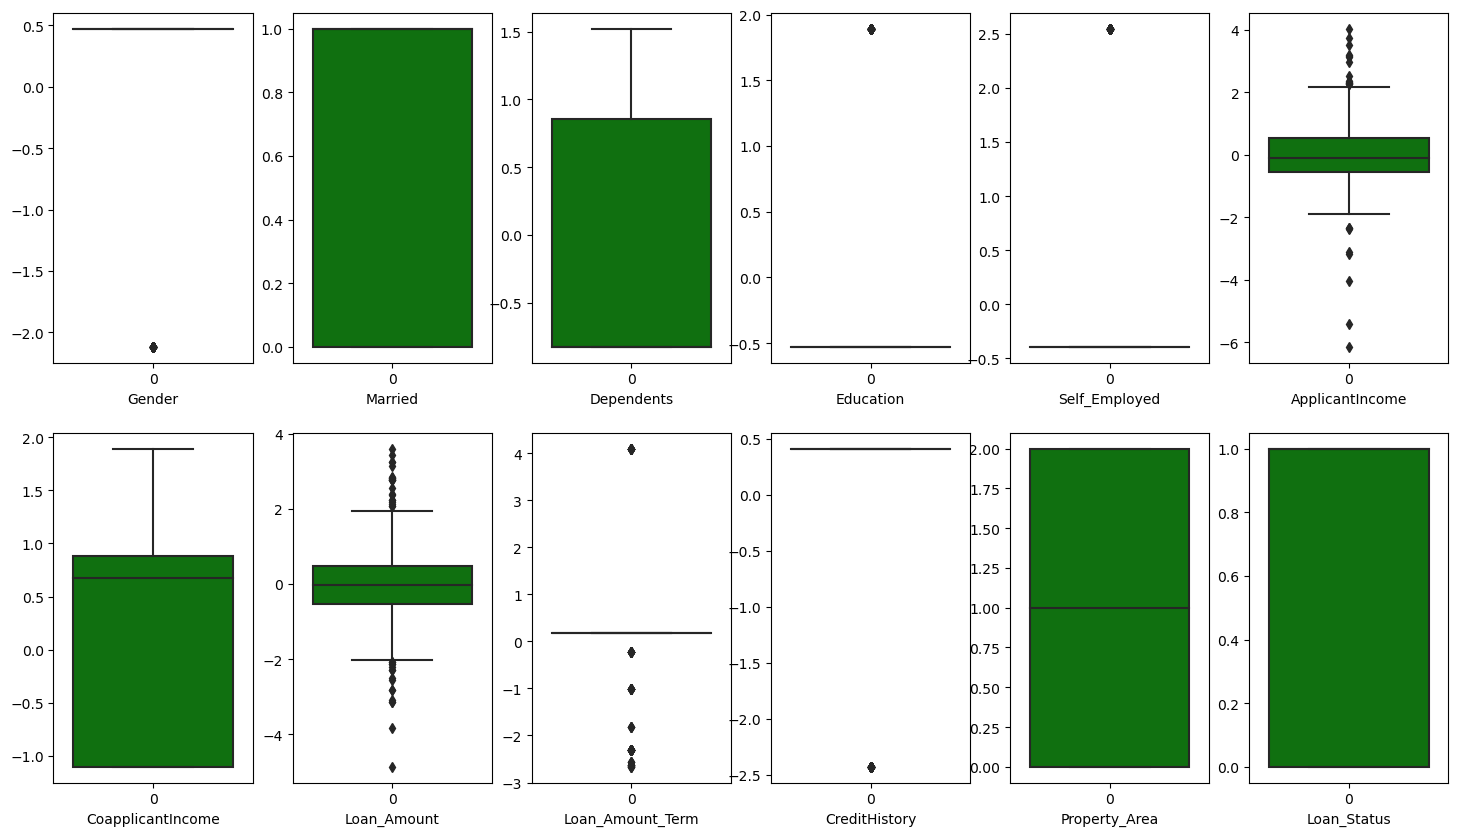

In [62]:
plt.figure(figsize=(18,10))
plot=1
for col in loan.columns:
    if plot<=12:
        plt.subplot(2,6,plot)
        sns.boxplot(loan[col],color='green')
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [63]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(loan))
loan_new=loan[(z<3).all(axis=1)]
loan_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
0,0.472343,0,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.411733,2,1
1,0.472343,1,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.411733,0,0
2,0.472343,1,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.411733,2,1
3,0.472343,1,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.411733,2,1
4,0.472343,0,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.411733,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,0,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.205100,0.185905,0.411733,0,1
610,0.472343,1,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.293317,-2.308570,0.411733,0,1
611,0.472343,1,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.372409,0.185905,0.411733,2,1
612,0.472343,1,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.738924,0.185905,0.411733,2,1


In [64]:
loan_new.shape

(582, 12)

In [65]:
loan.shape

(614, 12)

In [67]:
data_loss = (loan.shape[0]-loan_new.shape[0])/loan.shape[0]*100
print('loss of data in % :',data_loss)

loss of data in % : 5.211726384364821


# Splitting the dataset

In [68]:
#Splitting the data into 'x' and 'y' labels-

x=loan_new.drop('Loan_Status',axis=1)
y=loan_new['Loan_Status']
z = x.columns
print(x.shape)
print(y.shape)

(582, 11)
(582,)


1    404
0    178
Name: Loan_Status, dtype: int64


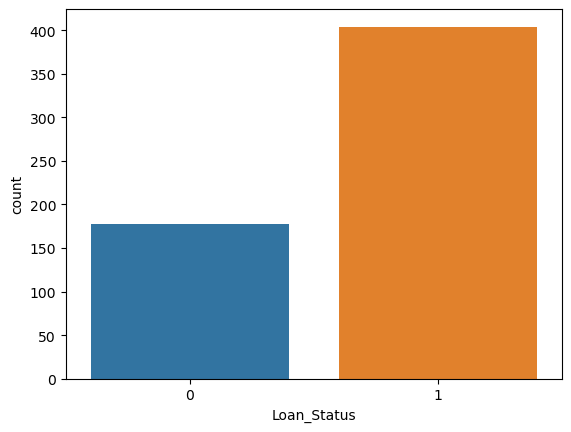

In [69]:
sns.countplot(x =y)
print(y.value_counts())

# Using SMOTE to balance the categorical data

In [70]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X,Y=sm.fit_resample(x,y)
Y

0      1
1      0
2      1
3      1
4      1
      ..
803    0
804    0
805    0
806    0
807    0
Name: Loan_Status, Length: 808, dtype: int64

1    404
0    404
Name: Loan_Status, dtype: int64


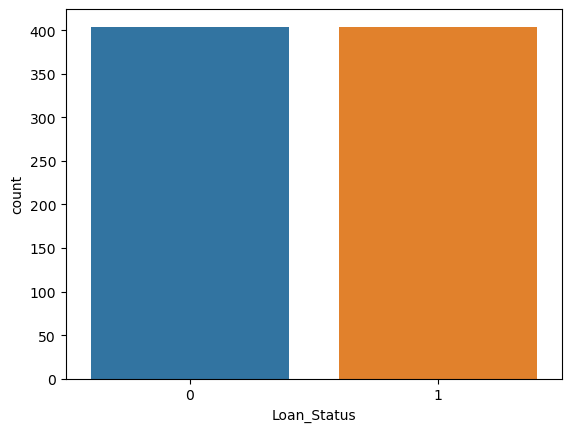

In [71]:
sns.countplot(x =Y)
print(Y.value_counts())

In [72]:
print(X.shape)
print(Y.shape)

(808, 11)
(808,)



After Applying SMOTE, the Data is Now Balanced

# Scaling the data using standardscaler

In [73]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = z)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,CreditHistory,Property_Area
0,0.466447,-1.382027,-0.827844,-0.530979,-0.390481,0.642901,-1.110298,0.265458,0.360528,0.407839,1.226307
1,0.466447,0.723575,0.857054,-0.530979,-0.390481,0.198845,0.747270,-0.039191,0.360528,0.407839,-1.304582
2,0.466447,0.723575,-0.827844,-0.530979,2.560945,-0.599132,-1.110298,-1.499307,0.360528,0.407839,1.226307
3,0.466447,0.723575,-0.827844,1.883315,-0.390481,-0.889239,0.888695,-0.184491,0.360528,0.407839,1.226307
4,0.466447,-1.382027,-0.827844,-0.530979,-0.390481,0.688675,-1.110298,0.179795,0.360528,0.407839,1.226307
...,...,...,...,...,...,...,...,...,...,...,...
577,-2.143864,-1.382027,-0.827844,-0.530979,-0.390481,-0.664464,-1.110298,-1.341758,0.360528,0.407839,-1.304582
578,0.466447,0.723575,1.526477,-0.530979,-0.390481,-0.004850,-1.110298,-2.555931,-2.996923,0.407839,-1.304582
579,0.466447,0.723575,0.857054,-0.530979,-0.390481,1.212790,0.204081,1.534086,0.360528,0.407839,1.226307
580,0.466447,0.723575,1.320469,-0.530979,-0.390481,1.103682,-1.110298,0.827277,0.360528,0.407839,1.226307


# Checking multicollinearity using Variance Inflation Factor


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)
vif(x)

,Column Name,VIF Factor
0,Gender,1.216928
1,Married,1.404929
2,Dependents,1.198544
3,Education,1.076663
4,Self_Employed,1.054054
5,ApplicantIncome,2.013367
6,CoapplicantIncome,1.634812
7,Loan_Amount,1.737483
8,Loan_Amount_Term,1.058964
9,CreditHistory,1.012137


There is no multicollinearity present in our data.


# ML Model Building

In [76]:
# Models:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [77]:
def random_st_cls(model):
    max_score = 0
    max_rs = 0
    print('\n',model)
    for i in range(1,50):
        x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = i)
        model.fit(x_train,y_train)
        pred_test = model.predict(x_test)
        score = accuracy_score(y_test,pred_test)
        if score > max_score:
            max_score = score
            max_rs = i
    print("At random state ", max_rs, 'the model is having accuracy score of ', max_score)
    return max_rs

In [78]:
def model_fit_cls(model, rs):
    x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = rs)
    model.fit(x_train,y_train)
    pred_test = model.predict(x_test)
    cv_score = cross_val_score(model,x,y, cv = 5)
    cv_mean = cv_score.mean()
    print(f" Accuracy score is: {accuracy_score(y_test,pred_test)*100:.2f}")
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,pred_test))
    print ('\n','Classification Report:','\n',classification_report(y_test,pred_test))
    print("The cv score is ", cv_mean, "and the accuracy score  is ",accuracy_score(y_test,pred_test))
    print(f'\n Difference between accuracy score and cross val score {(accuracy_score(y_test,pred_test)-cv_mean)*100:.2f}')
    print("-"*50)

In [79]:
def model_cls(m):
    m_rs = random_st_cls(m)
    model_fit_cls(m,m_rs)

In [80]:
Model_classify = [LogisticRegression(),RandomForestClassifier(), KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),ExtraTreesClassifier(),XGBClassifier()]


In [81]:
for i in Model_classify:
    model_cls(i)


 LogisticRegression()
At random state  32 the model is having accuracy score of  0.8628571428571429
 Accuracy score is: 86.29

 Confusion matrix: 
 [[ 25  24]
 [  0 126]]

 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.51      0.68        49
           1       0.84      1.00      0.91       126

    accuracy                           0.86       175
   macro avg       0.92      0.76      0.79       175
weighted avg       0.88      0.86      0.85       175

The cv score is  0.8144857058650162 and the accuracy score  is  0.8628571428571429

 Difference between accuracy score and cross val score 4.84
--------------------------------------------------

 RandomForestClassifier()
At random state  37 the model is having accuracy score of  0.84
 Accuracy score is: 84.57

 Confusion matrix: 
 [[ 28  22]
 [  5 120]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.56  

LogisticRegression is our best model with acciuracy of 86%

# Hyper Parameter Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
# Creating the hyperparameter grid
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear','saga','sag'],
              'penalty': ['l1','l2'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'dual':[True,False],
            'max_iter': [100,110,120,130,140]}
# Instantiating the GridSearchCV object
grid = GridSearchCV( estimator = LogisticRegression(),  param_grid = param_grid, cv = 5)

In [83]:
grid.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'dual': [True, False],
                         'max_iter': [100, 110, 120, 130, 140],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga',
                                    'sag']})

In [84]:
grid.best_score_

0.8162098437960508

In [85]:
grid.best_params_

{'C': 0.01,
 'dual': False,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [86]:
 x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30, random_state = 33)

In [87]:
final_model_cls = LogisticRegression(solver = 'liblinear', C = 0.01, penalty = 'l1',dual=False,max_iter=100)
final_model_cls.fit(x_train,y_train)
y_pred=final_model_cls.predict(x_test)

print('classification report',classification_report(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('\n Accuracy of LogisticRegression After Hyperparameter Tuning',accuracy_score(y_test,y_pred)*100)


classification report               precision    recall  f1-score   support

           0       0.92      0.50      0.65        44
           1       0.85      0.98      0.91       131

    accuracy                           0.86       175
   macro avg       0.89      0.74      0.78       175
weighted avg       0.87      0.86      0.85       175

confusion_matrix: [[ 22  22]
 [  2 129]]

 Accuracy of LogisticRegression After Hyperparameter Tuning 86.28571428571429


In [88]:
def auc_roc(model):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
    auc_score = roc_auc_score(y_test, model.predict(x_test))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr, tpr, label = 'AUC ='+str(round(auc_score,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.title(model)
    plt.show()

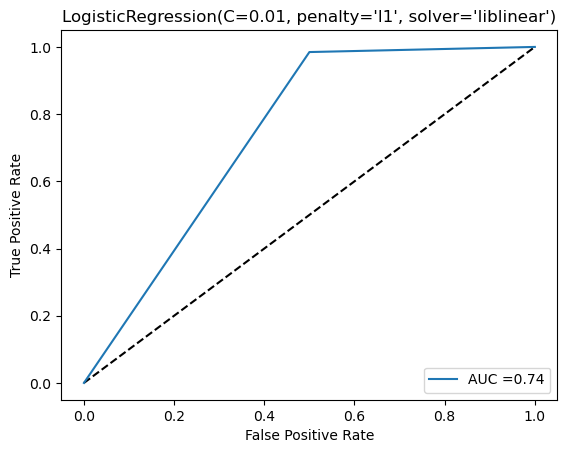

In [89]:
auc_roc(final_model_cls)

In [90]:
import pickle
filename = 'loan_classification.pkl'
pickle.dump(final_model_cls,open(filename,'wb'))

In [91]:
original = np.array(y_test)
predicted = np.round(np.array(final_model_cls.predict(x_test)),0)

loan_prediction = pd.DataFrame({'Original Loan_Status':original,'Predicted Loan Status':predicted})
loan_prediction

,Original Loan_Status,Predicted Loan Status
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
170,1,1
171,1,1
172,1,1
173,1,1
